#Import relavent libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading train and test data from drive

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/LeafDataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/LeafDataset/test.csv')

## Describe the data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


## Display the dimention of images

In [ ]:
import cv2
import os

# List all image files in a directory
image_folder = "/content/drive/MyDrive/LeafDataset/images"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

# Check image dimensions
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    print(f"Image {image_file} - Height: {height}, Width: {width}")

Image 138.jpg - Height: 311, Width: 627
Image 25.jpg - Height: 449, Width: 733
Image 1549.jpg - Height: 337, Width: 198
Image 923.jpg - Height: 354, Width: 771
Image 1085.jpg - Height: 489, Width: 535
Image 1379.jpg - Height: 938, Width: 1129
Image 1472.jpg - Height: 292, Width: 1200
Image 422.jpg - Height: 395, Width: 694
Image 279.jpg - Height: 726, Width: 971
Image 505.jpg - Height: 713, Width: 542
Image 63.jpg - Height: 379, Width: 689
Image 164.jpg - Height: 509, Width: 568
Image 1249.jpg - Height: 647, Width: 786
Image 998.jpg - Height: 537, Width: 514
Image 208.jpg - Height: 245, Width: 660
Image 1071.jpg - Height: 410, Width: 792
Image 1184.jpg - Height: 588, Width: 476
Image 1294.jpg - Height: 482, Width: 192
Image 674.jpg - Height: 710, Width: 369
Image 767.jpg - Height: 931, Width: 1050
Image 636.jpg - Height: 495, Width: 997
Image 1084.jpg - Height: 380, Width: 730
Image 1540.jpg - Height: 420, Width: 637
Image 1208.jpg - Height: 403, Width: 746
Image 1098.jpg - Height: 280

## Save images in the training only

In [ ]:
# Remove images with missing or corrupted data
# List all image files in a directory
image_folder = "/content/drive/MyDrive/LeafDataset/images"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]
cleaned_images = [img for img in image_files if cv2.imread(os.path.join(image_folder, img)) is not None]

In [ ]:
import re

def getNumber(string):
  # Use regular expression to find the first occurrence of a number in the string
  match = re.search(r'\d+', string)

  # Check if a match is found
  if match:
        number = int(match.group())
        return number

In [ ]:
import cv2
import glob
from PIL import Image
from matplotlib import pyplot as plt
import os

path = "/content/drive/MyDrive/LeafDataset/images/*.jpg"
save_directory = "/content/drive/MyDrive/LeafDataset/imagesTrain"

# Get a list of files in the specified path
image_files = glob.glob(path)

train_id = train['id'].values

# Create the save directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Limit the number of images to save to 1548
num_images_to_process = min(1548, len(image_files))

# Iterate over 1548 files
for i, file in enumerate(image_files[:num_images_to_process]):
    id = getNumber(file)
    if id in train_id:
        image_read = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

        # Save the image with the ID to the specified directory
        save_path = os.path.join(save_directory, f"{id}.jpg")
        cv2.imwrite(save_path, image_read)


## Resize images (if needed)


In [ ]:
from PIL import Image

# Resize images to a standard size
standard_size = (224, 224)  # Adjust size as needed
resized_images = []

for image_file in cleaned_images:
    image_path = os.path.join(image_folder, image_file)
    img = Image.open(image_path)
    img = img.resize(standard_size)
    img.save(os.path.join("path/to/resized", image_file))
    resized_images.append(image_file)


FileNotFoundError: ignored

## Display Images

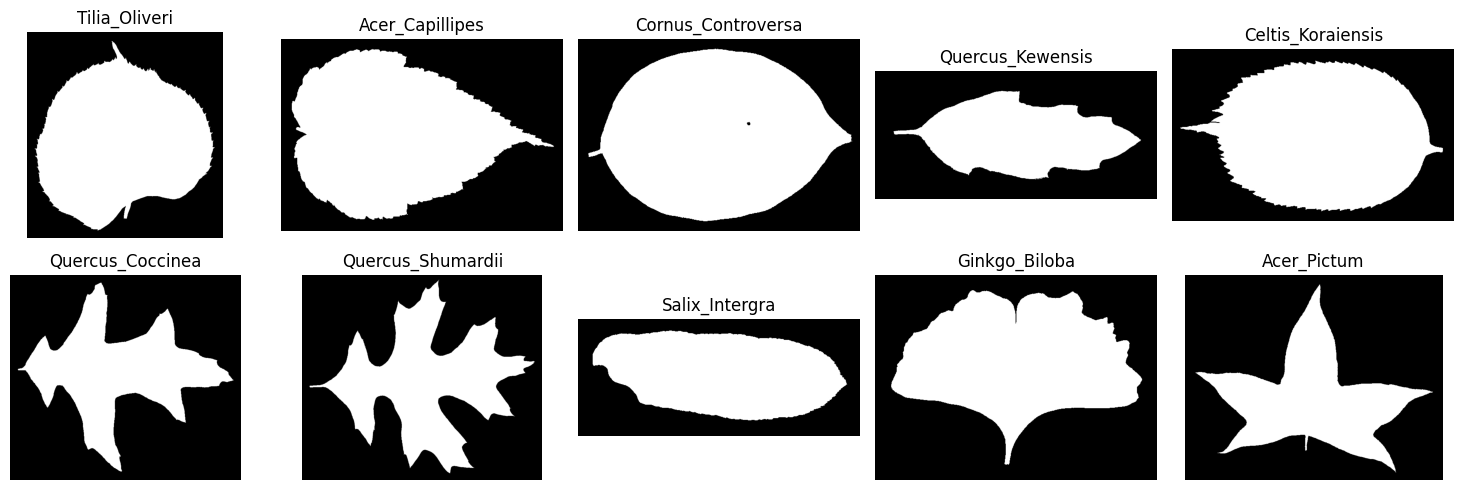

In [ ]:
import cv2
import glob
from PIL import Image
from matplotlib import pyplot as plt

path = "/content/drive/MyDrive/LeafDataset/imagesTrain/*.jpg"


# Get a list of files in the specified path
image_files = glob.glob(path)

#numpy_array = df['Column1'].values
train_id = train['id'].values

# Limit the number of images to display to 10
num_images_to_display = min(10, len(image_files))

# Set up a subplot grid
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

# Iterate over the first 10 files
for i, (file, ax) in enumerate(zip(image_files[:num_images_to_display], axes.flatten())):
    # Read the image in grayscale mode
    id = getNumber(file)
    if id in train_id:
      image_read = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

      ax.imshow(image_read, cmap='gray')
      ax.set_title(f"{train.loc[train['id'] == id, 'species'].iloc[0]}")
      ax.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Clean the data

## Checking for missing values or duplicates

In [ ]:
import pandas as pd
# Check for missing values in the 'train' dataframe
missing_values_train = train.isnull().sum()
print("Missing values in train dataframe:")
print(missing_values_train[missing_values_train > 0])

# Check for missing values in the 'test' dataframe
missing_values_test = test.isnull().sum()
print("\nMissing values in test dataframe:")
print(missing_values_test[missing_values_test > 0])

# Check for duplicates in the 'train' dataframe
duplicates_train = train.duplicated()
print("\nNumber of duplicate rows in train dataframe:", duplicates_train.sum())

# Check for duplicates in the 'test' dataframe
duplicates_test = test.duplicated()
print("Number of duplicate rows in test dataframe:", duplicates_test.sum())

# Correct missing values (if needed)
# Ex: If you decide to fill missing values with the mean
train = train.fillna(train.mean())
test = test.fillna(train.mean())  # Use the same mean from the training set for consistency

# Correct duplicates (if needed)
# Ex: If you decide to drop duplicates
train = train.drop_duplicates()
test = test.drop_duplicates()

# Confirm the changes
print("\nAfter correction:")
print("Missing values in train dataframe:", train.isnull().sum().sum())
print("Missing values in test dataframe:", test.isnull().sum().sum())
print("Number of duplicate rows in train dataframe:", train.duplicated().sum())
print("Number of duplicate rows in test dataframe:", test.duplicated().sum())


Missing values in train dataframe:
Series([], dtype: int64)

Missing values in test dataframe:
Series([], dtype: int64)

Number of duplicate rows in train dataframe: 0
Number of duplicate rows in test dataframe: 0


<ipython-input-42-93add54cf2c0>:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())
<ipython-input-42-93add54cf2c0>:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test = test.fillna(train.mean())  # Use the same mean from the training set for consistency



After correction:
Missing values in train dataframe: 0
Missing values in test dataframe: 0
Number of duplicate rows in train dataframe: 0
Number of duplicate rows in test dataframe: 0


## Visualization

### Distribution of Species

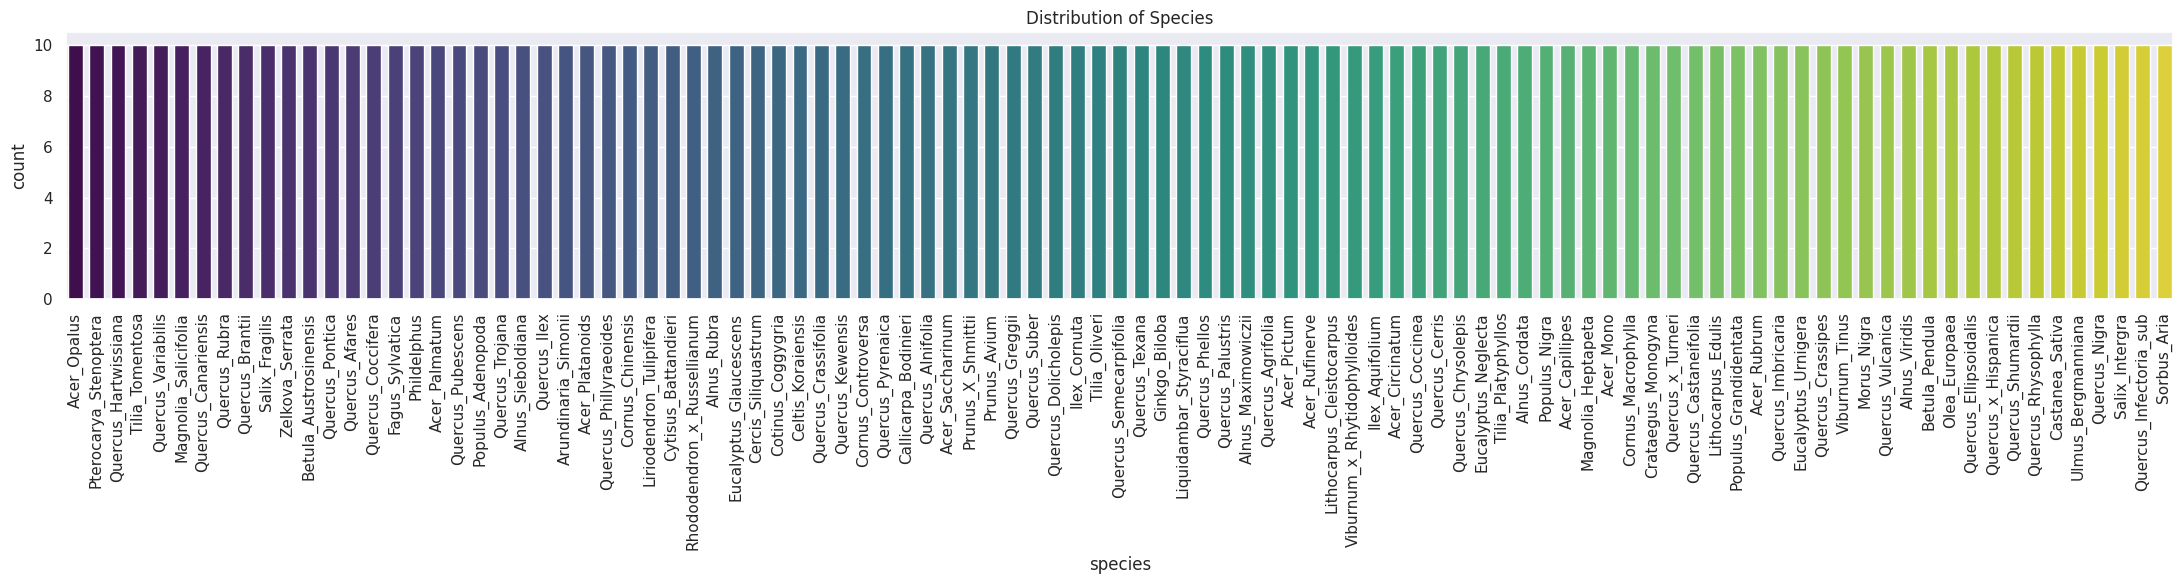

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

plt.figure(figsize=(22, 6))
sns.countplot(x='species', data=train, palette='viridis', width=0.7)
plt.title('Distribution of Species')
plt.xticks(rotation=90)
plt.margins(x=0.0009)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


### Distribution of feature

<ipython-input-39-faf6e401ca0d>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


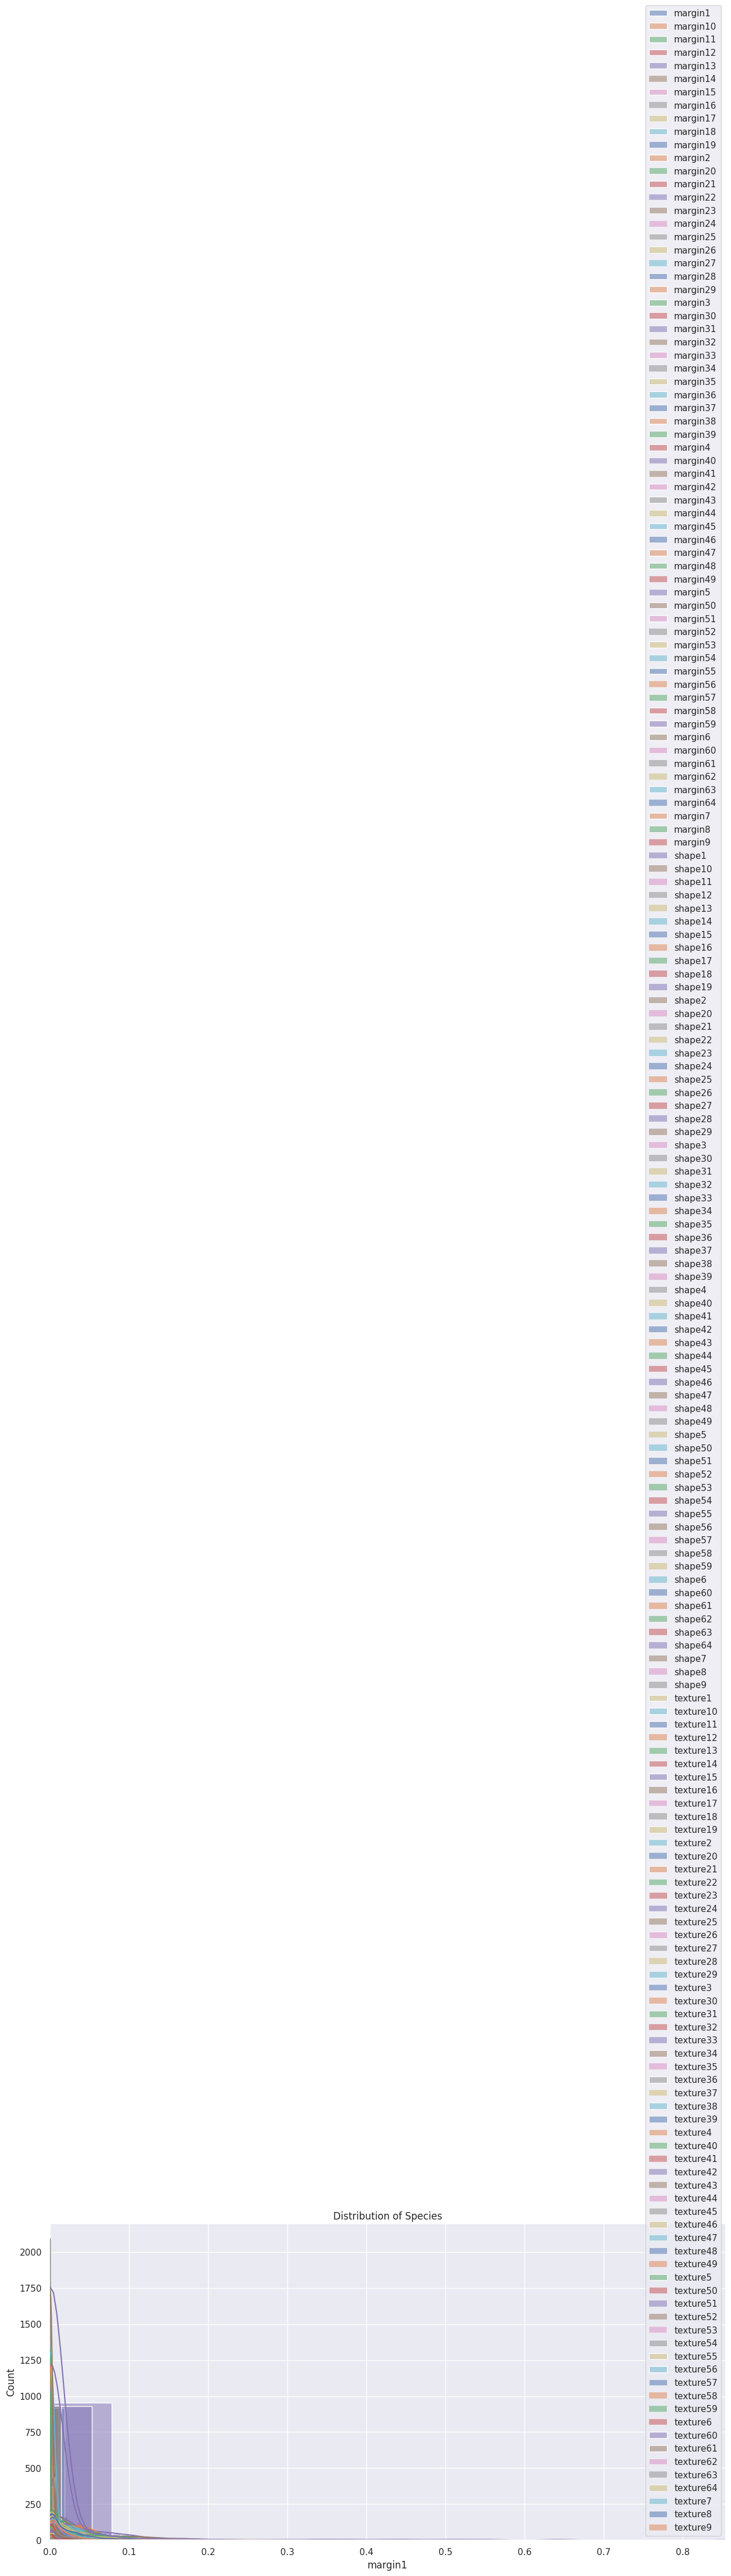

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the feature columns for visualization
feature_columns = train.columns.difference(['id', 'species'])

# Plot histograms for each feature
plt.figure(figsize=(15, 8))
for feature in feature_columns:
    sns.histplot(train[feature], kde=True, label=feature)

plt.legend()
plt.title('Distribution of Species')
plt.margins(x=0.0009)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


## Correlation heatmap and summary statistics

In [ ]:
# Display summary statistics for feature scales
print("Summary Statistics for Feature Scales:")
print(train[feature_columns].describe())

Summary Statistics for Feature Scales:
          margin1    margin10    margin11    margin12    margin13    margin14  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.017412    0.018639    0.024209    0.011975    0.041252    0.008053   
std      0.019739    0.016071    0.026086    0.011732    0.046341    0.013273   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001953    0.005859    0.003906    0.001953    0.007812    0.000000   
50%      0.009766    0.015625    0.013672    0.007812    0.025391    0.001953   
75%      0.025391    0.027344    0.041016    0.019531    0.063965    0.007812   
max      0.087891    0.097656    0.125000    0.052734    0.388670    0.082031   

         margin15    margin16    margin17    margin18  ...   texture59  \
count  990.000000  990.000000  990.000000  990.000000  ...  990.000000   
mean     0.015609    0.000110    0.015128    0.020107  ...    0.016108   
std      

   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883  

<ipython-input-2-0446cbc25c16>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[features].corr()


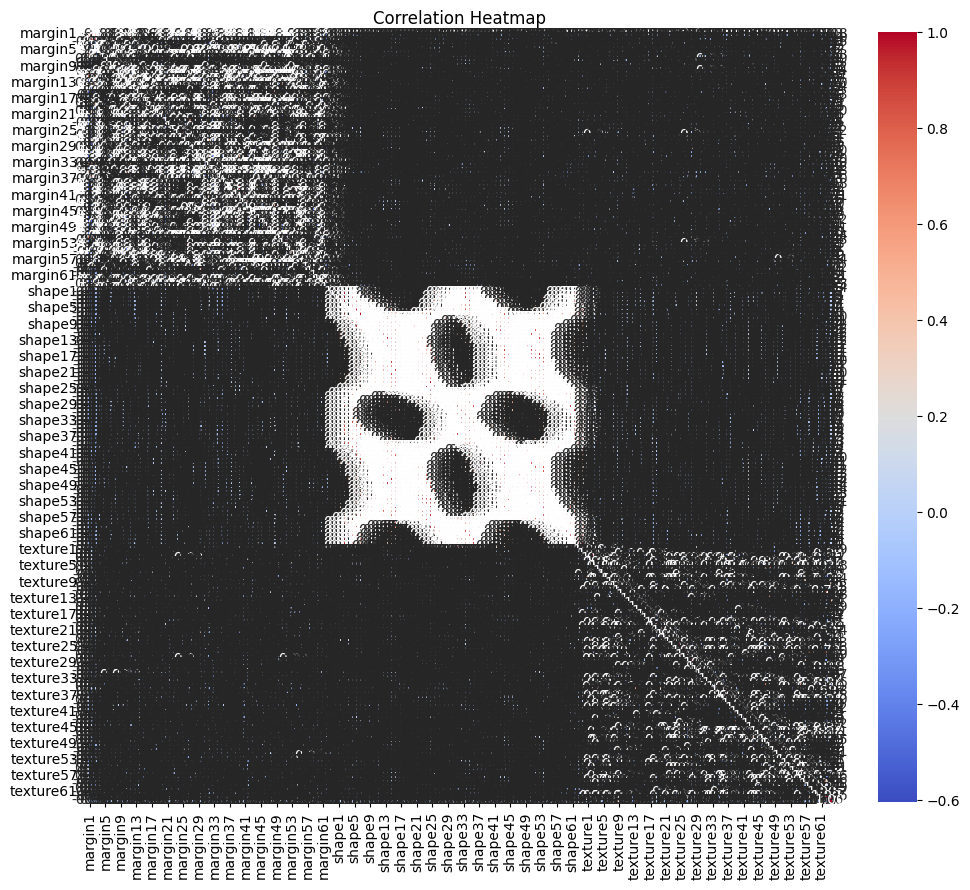

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/LeafDataset/train.csv")  # Replace with the actual path

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Feature analysis and visualization
# Assuming you have features like 'feature_1', 'feature_2', ..., 'feature_n'
features = df.columns[1:-1]  # Adjust column indices based on your dataset structure


# Correlation heatmap
correlation_matrix = df[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##  Labels Encoding and Standardising the data




In [ ]:
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def encode(train, test):
    label_encoder = LabelEncoder().fit(train.species)
    labels = label_encoder.transform(train.species)
    classes = list(label_encoder.classes_)

    train = train.drop(['species', 'id'], axis=1)
    test = test.drop('id', axis=1)

    return train, labels, test, classes

train, labels, test, classes = encode(train, test)

# standardize train features
scaler = StandardScaler().fit(train.values)
scaled_train = scaler.transform(train.values)


<ipython-input-56-5114db9c9bdd>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


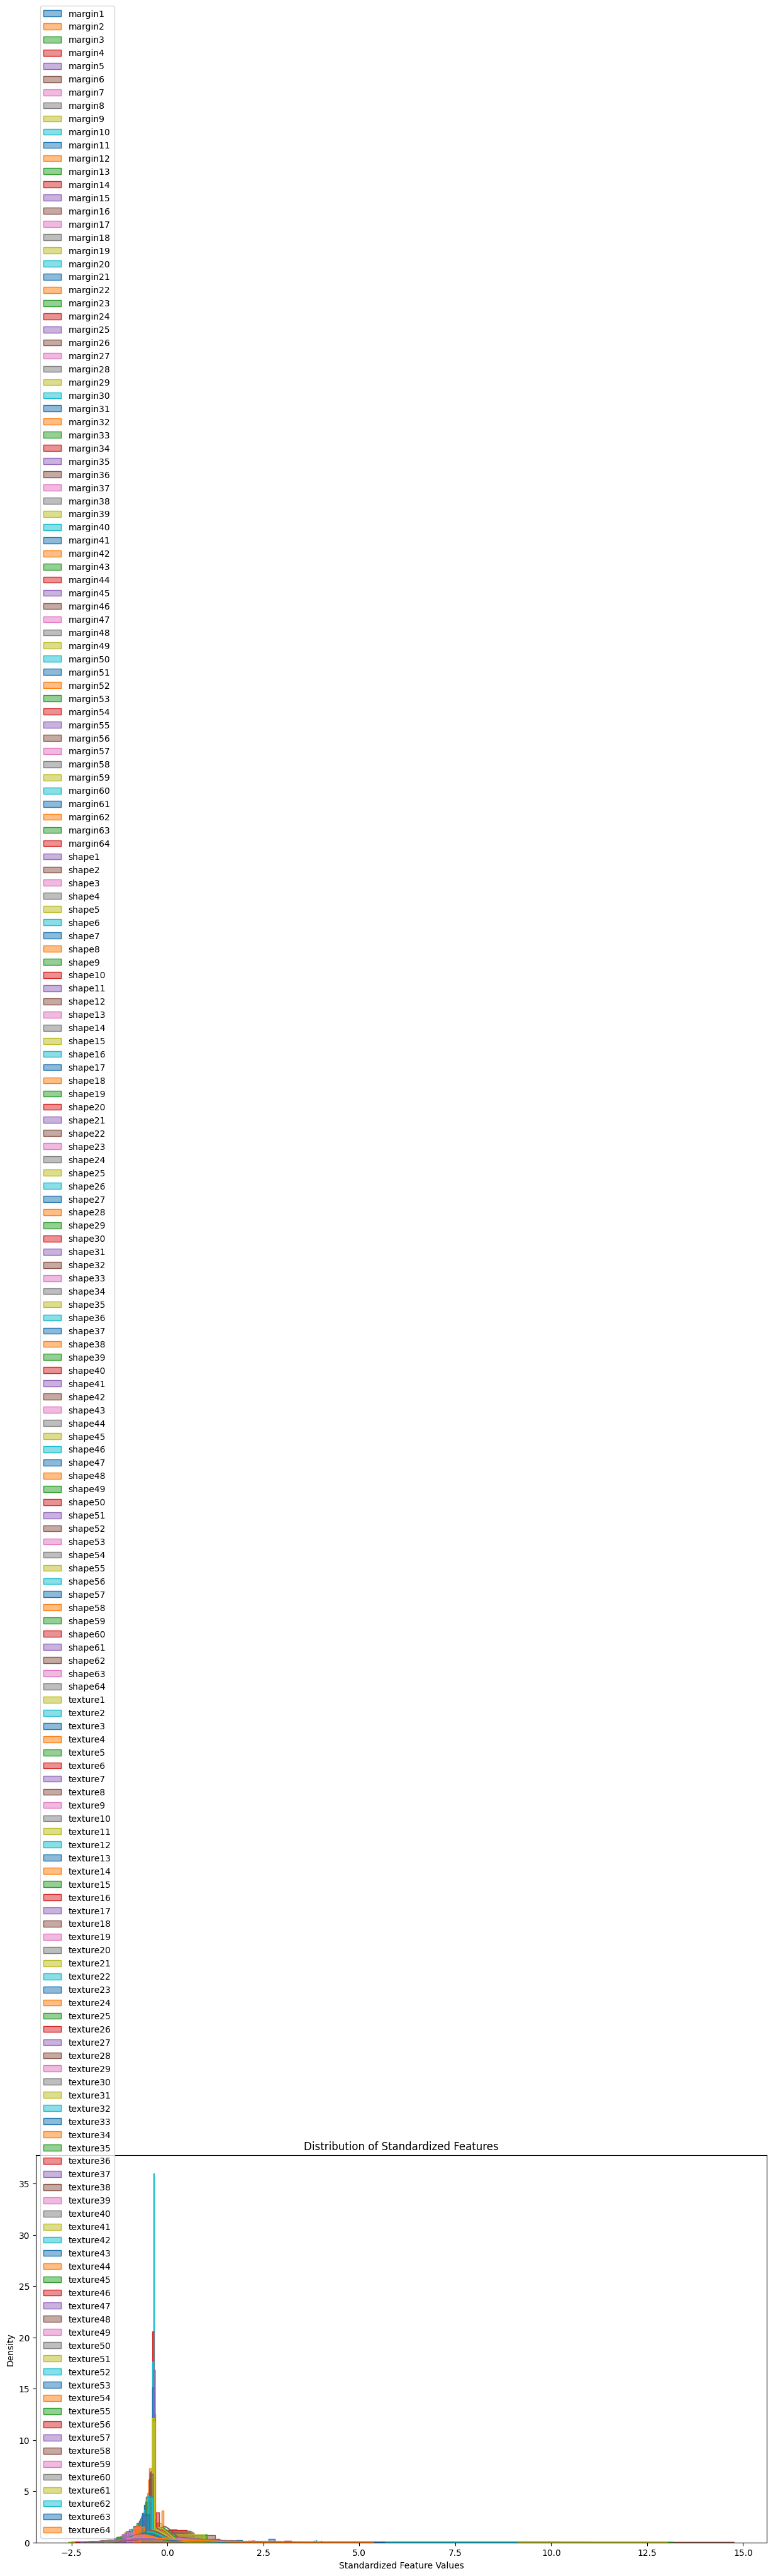

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the standardized features
scaled_train_df = pd.DataFrame(data=scaled_train, columns=train.columns)

feature_columns = scaled_train_df.columns

# Plot histograms for each standardized feature
plt.figure(figsize=(15, 8))
for feature in feature_columns:
    sns.histplot(scaled_train_df[feature], kde=True, label=feature, element='step', stat='density')

plt.legend()
plt.title('Distribution of Standardized Features')
plt.xlabel('Standardized Feature Values')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# split train data into train and test
sss = StratifiedShuffleSplit(test_size=0.2, random_state=23)
for train_index, valid_index in sss.split(scaled_train, labels):
    X_train, X_TEST = scaled_train[train_index], scaled_train[valid_index]
    y_train, y_TEST = labels[train_index], labels[valid_index]

In [ ]:
X_train.shape

(891, 192)

In [ ]:
# one-hot encoding of categorical labels
from keras.utils import to_categorical
from keras import utils as np_utils
y = to_categorical(labels)
y.shape

(990, 99)